In [1]:
%matplotlib inline
from __future__ import print_function
import json
import matplotlib
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np

In [2]:
json_data=open('../json.data/3300s.with.meta.json')
data = json.load(json_data)
json_data.close()

In [3]:
len(data)

3245

In [4]:
data[0]

{'filename': '1.cpp',
 'nloc': 45,
 'token_count': 296,
 'problem': 'https://www.codeforces.com/contest/492/problem/B',
 'solution': 'https://www.codeforces.com/contest/492/submission/44082853',
 'exec_time': '31 ms',
 'memory': '200 KB',
 'usertype': 'Expert',
 'function_count': 2,
 'library_count': 1,
 'macro_count': 0,
 'function_details': [{'cyclomatic_complexity': 6,
   'nloc': 31,
   'token_count': 215,
   'name': 'solve',
   'long_name': 'solve()',
   'start_line': 13,
   'end_line': 83,
   'parameters': [],
   'filename': '1.cpp',
   'top_nesting_level': 0,
   'length': 71,
   'fan_in': 0,
   'fan_out': 0,
   'general_fan_out': 0},
  {'cyclomatic_complexity': 3,
   'nloc': 10,
   'token_count': 62,
   'name': 'main',
   'long_name': 'main()',
   'start_line': 87,
   'end_line': 109,
   'parameters': [],
   'filename': '1.cpp',
   'top_nesting_level': 0,
   'length': 23,
   'fan_in': 0,
   'fan_out': 0,
   'general_fan_out': 0}]}

In [5]:
function_count = []
nloc = []
token_count = []
library_count = []
macro_count = []
usertype = []
main_cat = ['Expert','Master','Newbie','Pupil','Specialist','Unrated,','Candidate','International']
for x in data:
    if x['token_count'] > 0 and x['usertype'] in main_cat:
        function_count.append(x['function_count'])
        nloc.append(x['nloc'])
        token_count.append(x['token_count'])
        macro_count.append(x['macro_count'])
        library_count.append(x['library_count'])
        usertype.append(x['usertype'])

In [6]:
set(usertype)

{'Candidate',
 'Expert',
 'International',
 'Master',
 'Newbie',
 'Pupil',
 'Specialist',
 'Unrated,'}

In [7]:
def plot_data_1D(a,title='title'):
    plt.hlines(1,1,np.max(a)+np.max(a)*0.5)
    plt.xlim(0,np.max(a)+1)
    plt.ylim(0.5,1.5)
    y = np.ones(np.shape(a))
    plt.plot(a,y,'|',ms = 40)
    plt.title(title)

In [8]:
def plot_data_2D(X,Y,title='title',color='b'):
    plt.scatter(X,Y,c=color,alpha=0.1)
    plt.title(title)

In [9]:
def plotdata_frequency(data,title='title'):
    plt.hist(data, bins=np.arange(np.min(data), np.max(data)+1), align='left')
    plt.title(title)

In [10]:
def stat_display(data):
    stat_data = stats.describe(data)
    print ('min : ' , stat_data.minmax[0])
    print ('max : ' , stat_data.minmax[1])
    print ('mean : ' , stat_data.mean)
    print ('variance : ' , stat_data.variance)
    print ('skewness : ' , stat_data.skewness)
    print ('kurtosis : ' , stat_data.kurtosis)

In [11]:
def find_max_json(arr):
    return data[np.argmax(arr)]

In [12]:
def find_min_json(arr):
    return data[np.argmin(arr)]

In [13]:
def plot_data_1D_cat(X,C,title='Title'):
    c = ['b','r','m','g','c','y']
    Y = []
#     map_c = {}
#     for x,i in zip(set(C),range(len(set(C)))):
#         map_c[x] = c[i%6]
#     c = map(lambda x: map_c[x], C)
    f, ax = plt.subplots(len(set(C)),sharex=True,sharey=True)
    for x,i in zip(set(C),range(len(set(C)))):
        data = []
        for y,w in zip(X,C):
            if w == x:
                data.append(y)
        ax[i].hlines(1,1,np.max(data)+np.max(data)*0.5)
        
        Y = np.ones(len(data))
        
        ax[i].plot(data,Y,'|',ms = 40,c = c[i%6],label=x)
        ax[i].legend(loc="upper right")
    plt.title(title,y=len(set(C))+2)

In [14]:
def plot_data_2D_cat(X,Y,C,title='Title'):
    c = ['b','r','m','g','c','y']
#     map_c = {}
#     for x,i in zip(set(C),range(len(set(C)))):
#         map_c[x] = c[i%6]
#     c = map(lambda x: map_c[x], C)
    f, ax = plt.subplots(len(set(C)),sharex=True,sharey=True)
    cat = []
    plot = []
    for x,i in zip(set(C),range(len(set(C)))):
        data = []
        point = []
        for y,z,w in zip(X,Y,C):
            if w == x:
                data.append(y)
                point.append(z)
    
        l = ax[i].scatter(data,point,c=c[i%6],alpha=0.2)
        plot.append(l)
        cat.append(x)
    plt.title(title,y=len(set(C))+2) 
    plt.legend(plot,cat,bbox_to_anchor=(1.2, 1),
           bbox_transform=plt.gcf().transFigure)

In [15]:
def plot_frequency_cat(X,C,title='Title'):
    c = ['b','r','m','g','c','y']
    f, ax = plt.subplots(len(set(C)),sharex=True,sharey=True)
    for x,i in zip(set(C),range(len(set(C)))):
        data = []
        for y,w in zip(X,C):
            if w == x:
                data.append(y)
        ax[i].hist(data, bins=np.arange(np.min(data), np.max(data)+1), align='left',label=x,color=c[i%6])
        ax[i].legend(prop={'size':10})
    plt.title(title,y=len(set(C))+2)
#     plt.legend(plot,cat)

In [16]:
def box_plot_cat(X,C,title='Title'):
    l = [[]]*len(set(C))
    label = [[]]*len(set(C))
    for x,i in zip(set(C),range(len(set(C)))):
        data = []
        for y,w in zip(X,C):
            if w == x:
                data.append(y)
        l[i] = data
        label[i] = x
    fig = plt.figure(1, figsize=(9, 6))
    plt.title(title)
    ax = fig.add_subplot(111)
    bp = ax.boxplot(l)
    ax.set_xticklabels(label)

In [17]:
fig_size = plt.rcParams["figure.figsize"]
print(fig_size)
fig_size[0] = 9
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams["figure.figsize"]

[6.0, 4.0]


[9.0, 12.0]

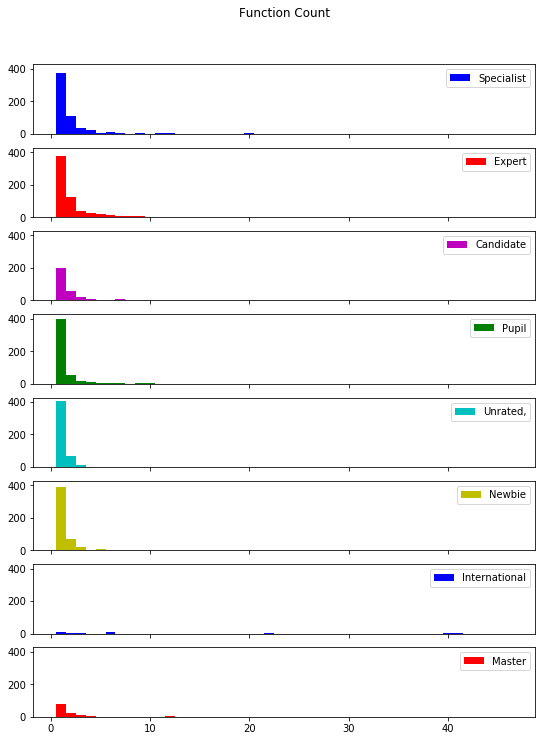

In [18]:
plot_frequency_cat(function_count,usertype,'Function Count')

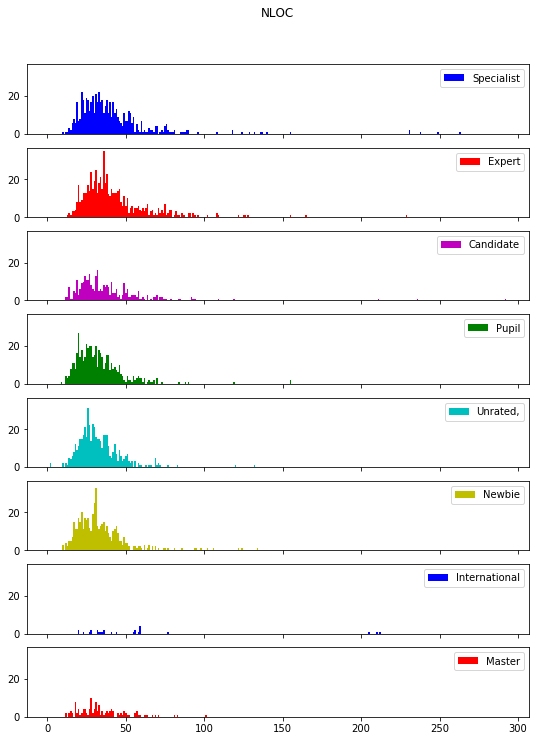

In [19]:
plot_frequency_cat(nloc,usertype,'NLOC')

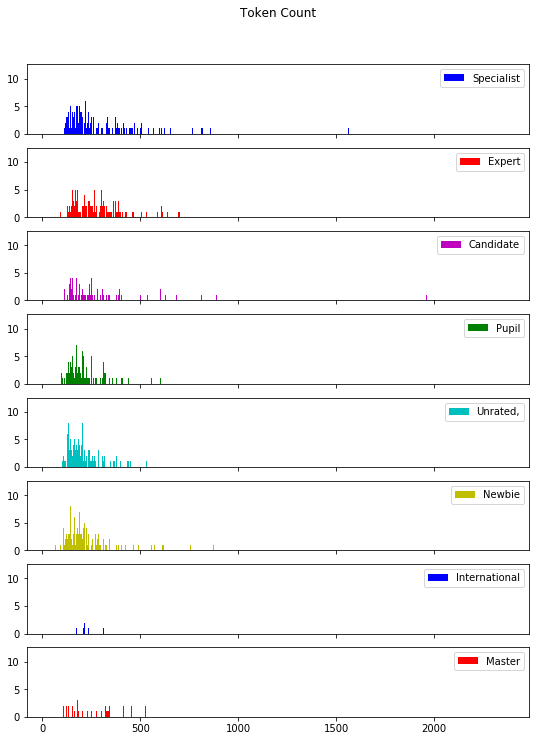

In [20]:
plot_frequency_cat(token_count,usertype,'Token Count')

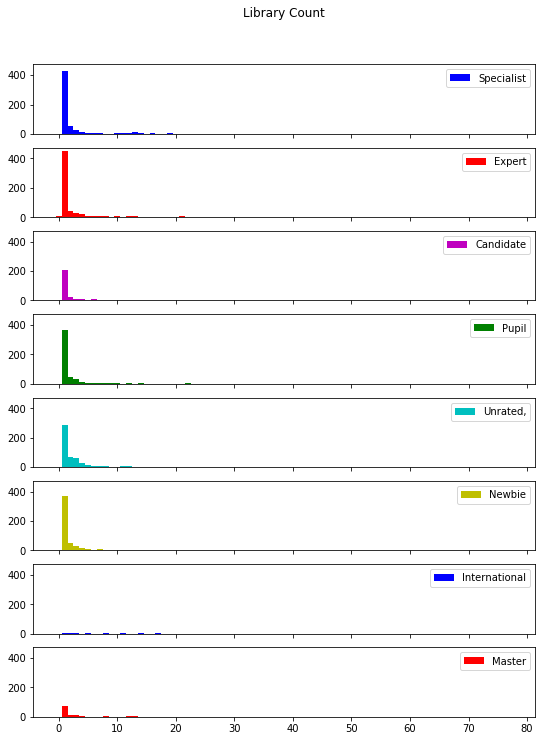

In [21]:
plot_frequency_cat(library_count,usertype,'Library Count')

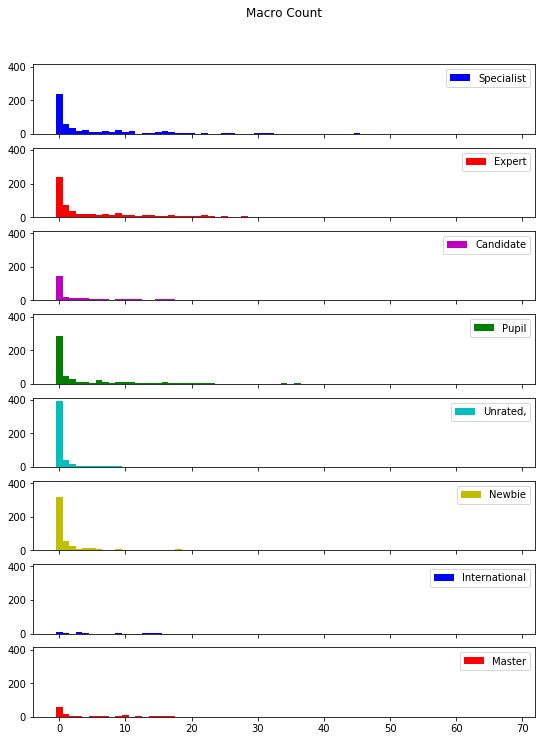

In [22]:
plot_frequency_cat(macro_count,usertype,'Macro Count')

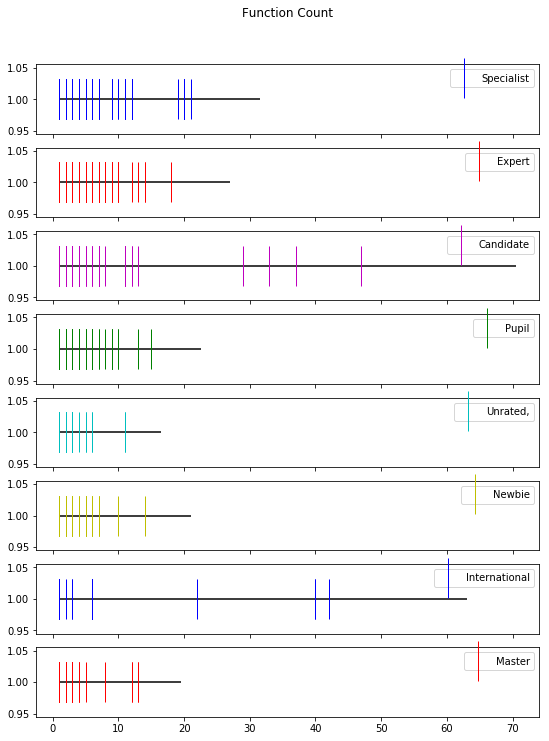

In [23]:
plot_data_1D_cat(function_count,usertype,title='Function Count')

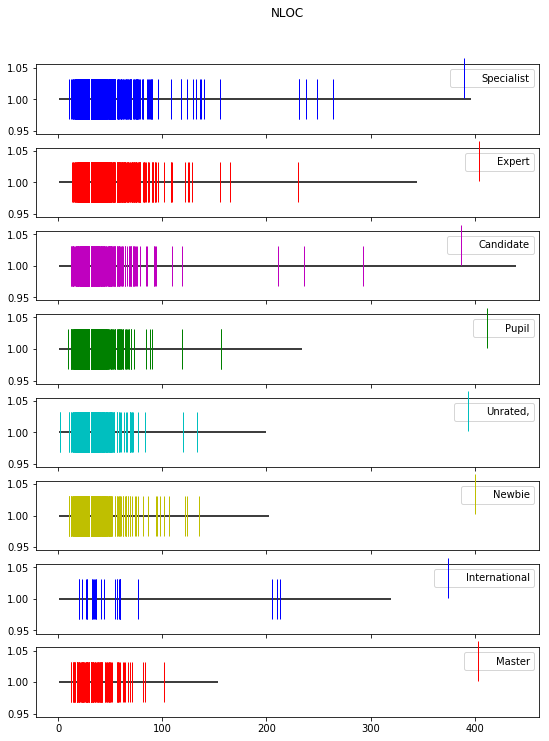

In [24]:
plot_data_1D_cat(nloc,usertype,title='NLOC')

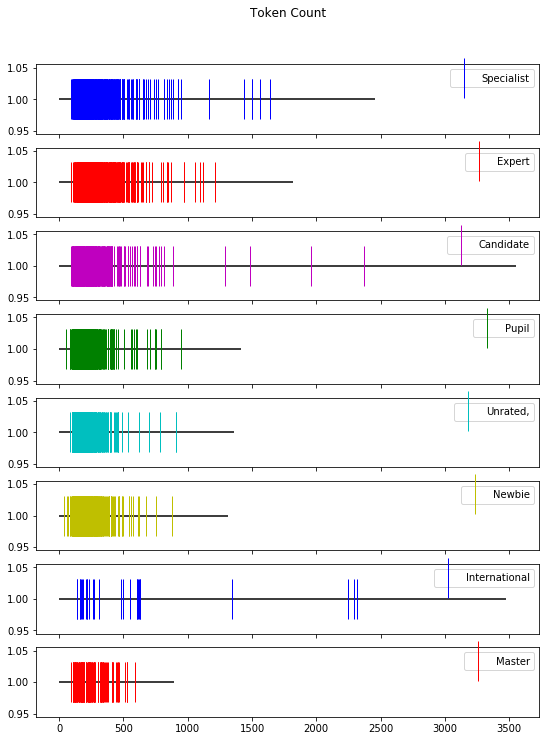

In [25]:
plot_data_1D_cat(token_count,usertype,title='Token Count')

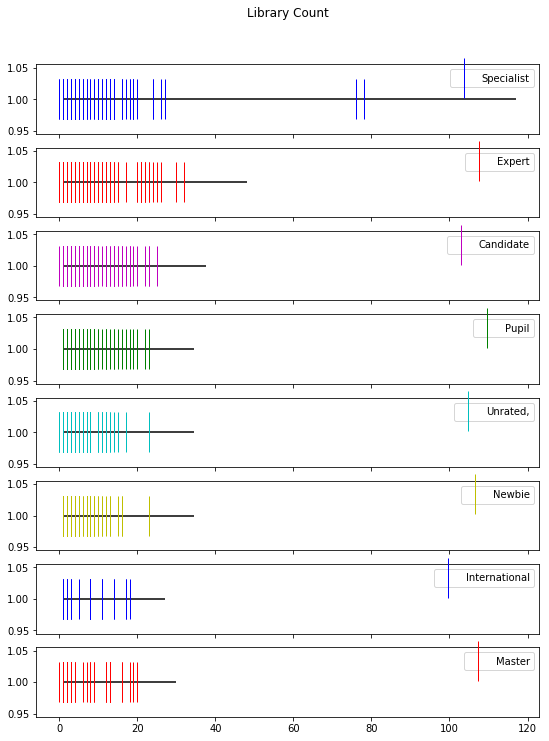

In [26]:
plot_data_1D_cat(library_count,usertype,title='Library Count')

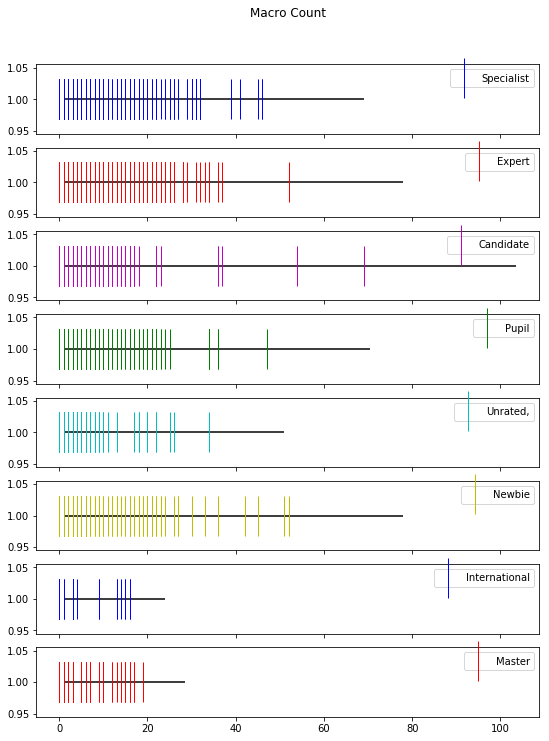

In [27]:
plot_data_1D_cat(macro_count,usertype,title='Macro Count')

In [28]:
stat_display(function_count)

min :  1
max :  47
mean :  1.841344643418159
variance :  6.885882792245809
skewness :  8.30220114322558
kurtosis :  100.58176355848015


In [29]:
stat_display(nloc)

min :  2
max :  293
mean :  37.204524033930255
variance :  453.8893321351073
skewness :  4.241223992844579
kurtosis :  32.16385460674679


In [30]:
stat_display(token_count)

min :  38
max :  2368
mean :  254.21143575243482
variance :  27125.84560142634
skewness :  4.90665361447385
kurtosis :  42.89512927677741


In [31]:
stat_display(library_count)

min :  0
max :  78
mean :  2.5535658184103047
variance :  17.121501265858278
skewness :  6.089367033011123
kurtosis :  73.22188622148593


In [32]:
stat_display(macro_count)

min :  0
max :  69
mean :  4.018850141376061
variance :  52.73880232291561
skewness :  2.6359578424489483
kurtosis :  9.109794687221651


In [33]:
find_max_json(function_count)

{'filename': '323.cpp',
 'nloc': 18,
 'token_count': 135,
 'problem': 'https://www.codeforces.com/contest/279/problem/B',
 'solution': 'https://www.codeforces.com/contest/279/submission/43002496',
 'exec_time': '92 ms',
 'memory': '400 KB',
 'usertype': 'Pupil',
 'function_count': 1,
 'library_count': 1,
 'macro_count': 0,
 'function_details': [{'cyclomatic_complexity': 3,
   'nloc': 16,
   'token_count': 128,
   'name': 'main',
   'long_name': 'main()',
   'start_line': 7,
   'end_line': 39,
   'parameters': [],
   'filename': '323.cpp',
   'top_nesting_level': 0,
   'length': 33,
   'fan_in': 0,
   'fan_out': 0,
   'general_fan_out': 0}]}

In [34]:
find_min_json(function_count)

{'filename': '100.cpp',
 'nloc': 29,
 'token_count': 192,
 'problem': 'https://www.codeforces.com/contest/492/problem/B',
 'solution': 'https://www.codeforces.com/contest/492/submission/43748906',
 'exec_time': '31 ms',
 'memory': '0 KB',
 'usertype': 'Unrated,',
 'function_count': 1,
 'library_count': 3,
 'macro_count': 0,
 'function_details': [{'cyclomatic_complexity': 3,
   'nloc': 25,
   'token_count': 181,
   'name': 'main',
   'long_name': 'main()',
   'start_line': 10,
   'end_line': 43,
   'parameters': [],
   'filename': '100.cpp',
   'top_nesting_level': 0,
   'length': 34,
   'fan_in': 0,
   'fan_out': 0,
   'general_fan_out': 0}]}

In [35]:
find_max_json(nloc)

{'filename': '323.cpp',
 'nloc': 18,
 'token_count': 135,
 'problem': 'https://www.codeforces.com/contest/279/problem/B',
 'solution': 'https://www.codeforces.com/contest/279/submission/43002496',
 'exec_time': '92 ms',
 'memory': '400 KB',
 'usertype': 'Pupil',
 'function_count': 1,
 'library_count': 1,
 'macro_count': 0,
 'function_details': [{'cyclomatic_complexity': 3,
   'nloc': 16,
   'token_count': 128,
   'name': 'main',
   'long_name': 'main()',
   'start_line': 7,
   'end_line': 39,
   'parameters': [],
   'filename': '323.cpp',
   'top_nesting_level': 0,
   'length': 33,
   'fan_in': 0,
   'fan_out': 0,
   'general_fan_out': 0}]}

In [36]:
find_min_json(nloc)

{'filename': '3992.cpp',
 'nloc': 33,
 'token_count': 237,
 'problem': 'https://www.codeforces.com/contest/975/problem/C',
 'solution': 'https://www.codeforces.com/contest/975/submission/42796833',
 'exec_time': '858 ms',
 'memory': '3400 KB',
 'usertype': 'Specialist',
 'function_count': 1,
 'library_count': 1,
 'macro_count': 1,
 'function_details': [{'cyclomatic_complexity': 7,
   'nloc': 31,
   'token_count': 230,
   'name': 'main',
   'long_name': 'main()',
   'start_line': 11,
   'end_line': 77,
   'parameters': [],
   'filename': '3992.cpp',
   'top_nesting_level': 0,
   'length': 67,
   'fan_in': 0,
   'fan_out': 0,
   'general_fan_out': 0}]}

In [37]:
find_min_json(token_count)

{'filename': '1425.cpp',
 'nloc': 42,
 'token_count': 300,
 'problem': 'https://www.codeforces.com/contest/371/problem/C',
 'solution': 'https://www.codeforces.com/contest/371/submission/43558814',
 'exec_time': '30 ms',
 'memory': '0 KB',
 'usertype': 'Specialist',
 'function_count': 2,
 'library_count': 1,
 'macro_count': 0,
 'function_details': [{'cyclomatic_complexity': 5,
   'nloc': 11,
   'token_count': 100,
   'name': 'check',
   'long_name': 'check( long long tot)',
   'start_line': 15,
   'end_line': 37,
   'parameters': ['tot'],
   'filename': '1425.cpp',
   'top_nesting_level': 0,
   'length': 23,
   'fan_in': 0,
   'fan_out': 0,
   'general_fan_out': 0},
  {'cyclomatic_complexity': 6,
   'nloc': 24,
   'token_count': 159,
   'name': 'main',
   'long_name': 'main()',
   'start_line': 39,
   'end_line': 85,
   'parameters': [],
   'filename': '1425.cpp',
   'top_nesting_level': 0,
   'length': 47,
   'fan_in': 0,
   'fan_out': 0,
   'general_fan_out': 0}]}

In [38]:
find_max_json(library_count)

{'filename': '4293.cpp',
 'nloc': 58,
 'token_count': 340,
 'problem': 'https://www.codeforces.com/contest/777/problem/D',
 'solution': 'https://www.codeforces.com/contest/777/submission/41679810',
 'exec_time': '93 ms',
 'memory': '11700 KB',
 'usertype': 'Specialist',
 'function_count': 5,
 'library_count': 1,
 'macro_count': 8,
 'function_details': [{'cyclomatic_complexity': 2,
   'nloc': 6,
   'token_count': 22,
   'name': 'max',
   'long_name': 'max( ll a , ll b)',
   'start_line': 11,
   'end_line': 21,
   'parameters': ['a', 'b'],
   'filename': '4293.cpp',
   'top_nesting_level': 0,
   'length': 11,
   'fan_in': 0,
   'fan_out': 0,
   'general_fan_out': 0},
  {'cyclomatic_complexity': 1,
   'nloc': 4,
   'token_count': 22,
   'name': 'min',
   'long_name': 'min( ll a , ll b)',
   'start_line': 25,
   'end_line': 31,
   'parameters': ['a', 'b'],
   'filename': '4293.cpp',
   'top_nesting_level': 0,
   'length': 7,
   'fan_in': 0,
   'fan_out': 0,
   'general_fan_out': 0},
  {'cy

In [39]:
find_min_json(library_count)

{'filename': '296.cpp',
 'nloc': 24,
 'token_count': 137,
 'problem': 'https://www.codeforces.com/contest/279/problem/B',
 'solution': 'https://www.codeforces.com/contest/279/submission/43109064',
 'exec_time': '278 ms',
 'memory': '400 KB',
 'usertype': 'Newbie',
 'function_count': 1,
 'library_count': 1,
 'macro_count': 0,
 'function_details': [{'cyclomatic_complexity': 4,
   'nloc': 22,
   'token_count': 130,
   'name': 'main',
   'long_name': 'main()',
   'start_line': 5,
   'end_line': 47,
   'parameters': [],
   'filename': '296.cpp',
   'top_nesting_level': 0,
   'length': 43,
   'fan_in': 0,
   'fan_out': 0,
   'general_fan_out': 0}]}

In [40]:
find_max_json(macro_count)

{'filename': '4754.cpp',
 'nloc': 28,
 'token_count': 179,
 'problem': 'https://www.codeforces.com/contest/372/problem/A',
 'solution': 'https://www.codeforces.com/contest/372/submission/35429885',
 'exec_time': '904 ms',
 'memory': '4000 KB',
 'usertype': 'Master',
 'function_count': 1,
 'library_count': 2,
 'macro_count': 0,
 'function_details': [{'cyclomatic_complexity': 6,
   'nloc': 24,
   'token_count': 164,
   'name': 'main',
   'long_name': 'main()',
   'start_line': 9,
   'end_line': 55,
   'parameters': [],
   'filename': '4754.cpp',
   'top_nesting_level': 0,
   'length': 47,
   'fan_in': 0,
   'fan_out': 0,
   'general_fan_out': 0}]}

In [41]:
find_min_json(macro_count)

{'filename': '1.cpp',
 'nloc': 45,
 'token_count': 296,
 'problem': 'https://www.codeforces.com/contest/492/problem/B',
 'solution': 'https://www.codeforces.com/contest/492/submission/44082853',
 'exec_time': '31 ms',
 'memory': '200 KB',
 'usertype': 'Expert',
 'function_count': 2,
 'library_count': 1,
 'macro_count': 0,
 'function_details': [{'cyclomatic_complexity': 6,
   'nloc': 31,
   'token_count': 215,
   'name': 'solve',
   'long_name': 'solve()',
   'start_line': 13,
   'end_line': 83,
   'parameters': [],
   'filename': '1.cpp',
   'top_nesting_level': 0,
   'length': 71,
   'fan_in': 0,
   'fan_out': 0,
   'general_fan_out': 0},
  {'cyclomatic_complexity': 3,
   'nloc': 10,
   'token_count': 62,
   'name': 'main',
   'long_name': 'main()',
   'start_line': 87,
   'end_line': 109,
   'parameters': [],
   'filename': '1.cpp',
   'top_nesting_level': 0,
   'length': 23,
   'fan_in': 0,
   'fan_out': 0,
   'general_fan_out': 0}]}

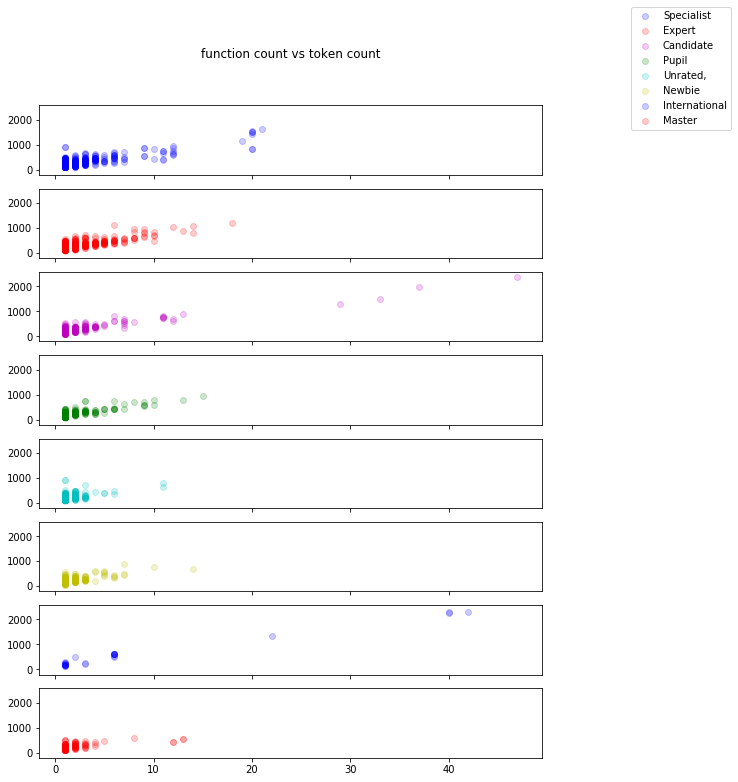

In [42]:
plot_data_2D_cat(function_count,token_count,usertype,'function count vs token count')

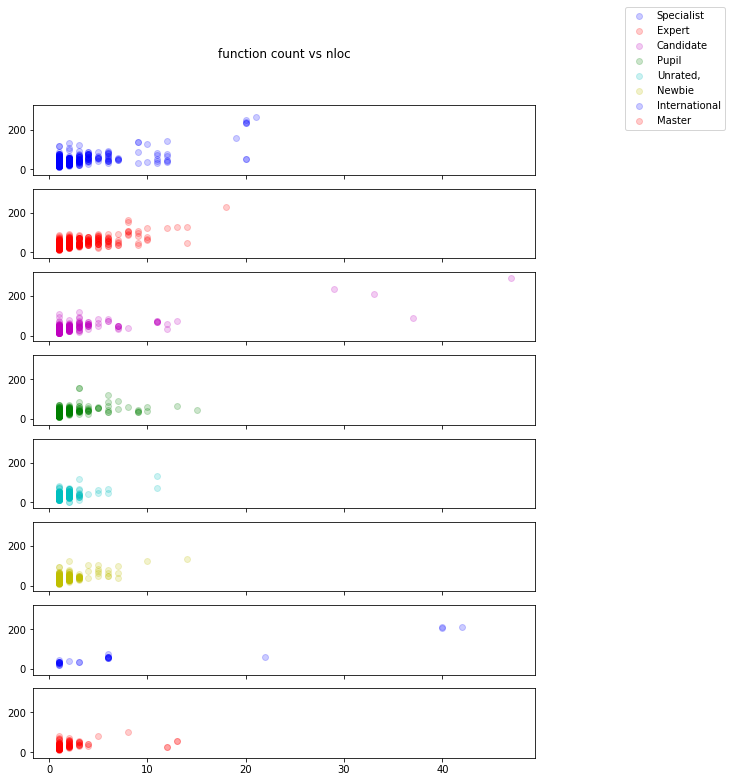

In [43]:
plot_data_2D_cat(function_count,nloc,usertype,'function count vs nloc')

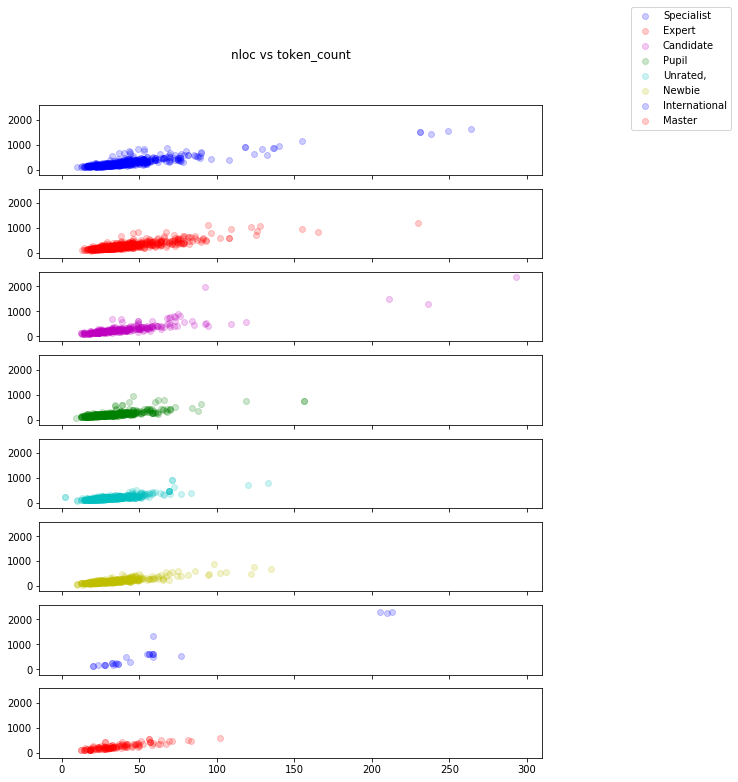

In [44]:
plot_data_2D_cat(nloc,token_count,usertype,'nloc vs token_count')

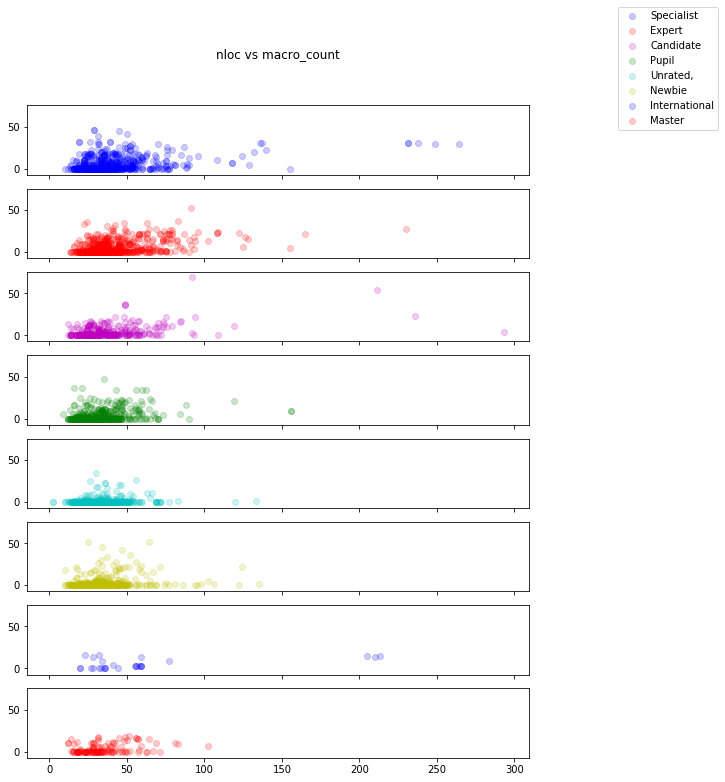

In [45]:
plot_data_2D_cat(nloc,macro_count,usertype,'nloc vs macro_count')

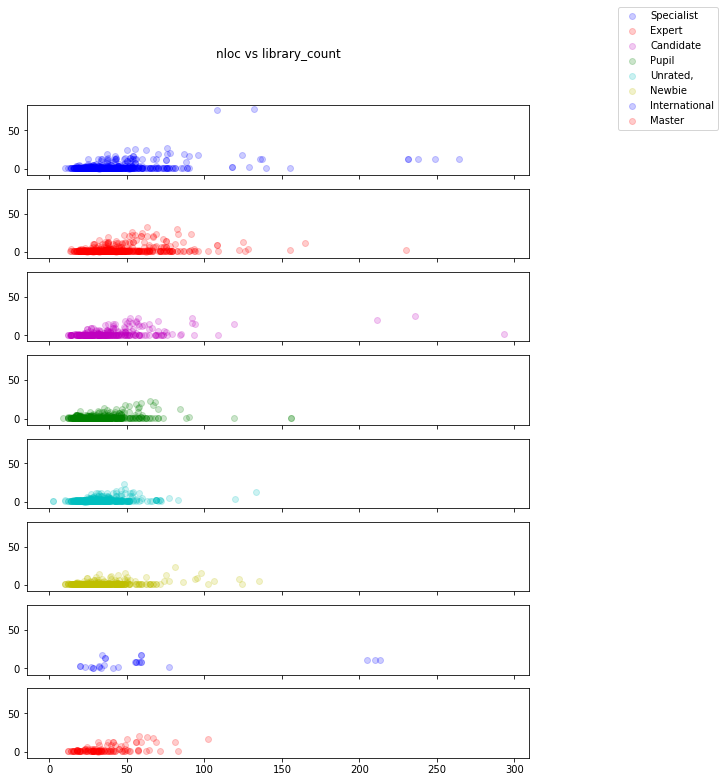

In [46]:
plot_data_2D_cat(nloc,library_count,usertype,'nloc vs library_count')

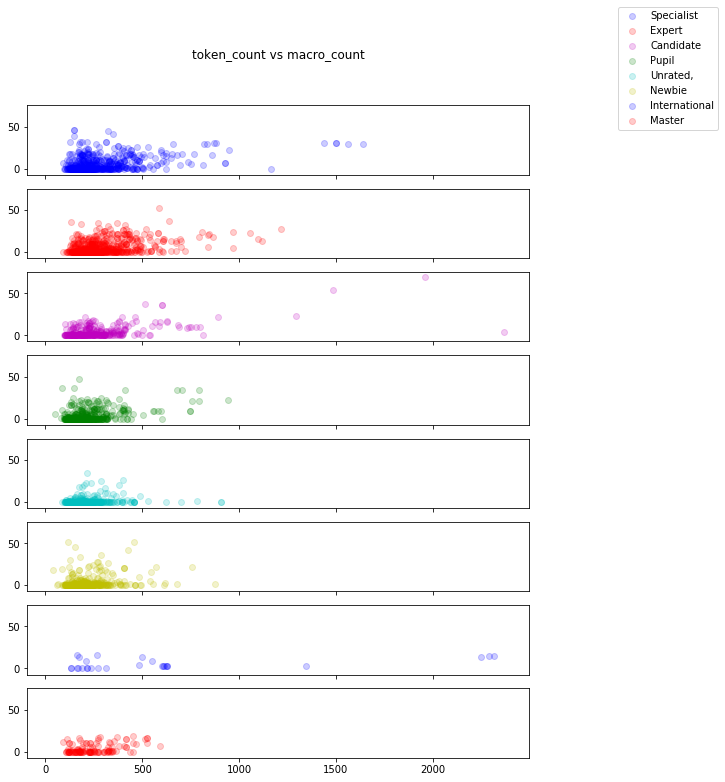

In [47]:
plot_data_2D_cat(token_count,macro_count,usertype,'token_count vs macro_count')

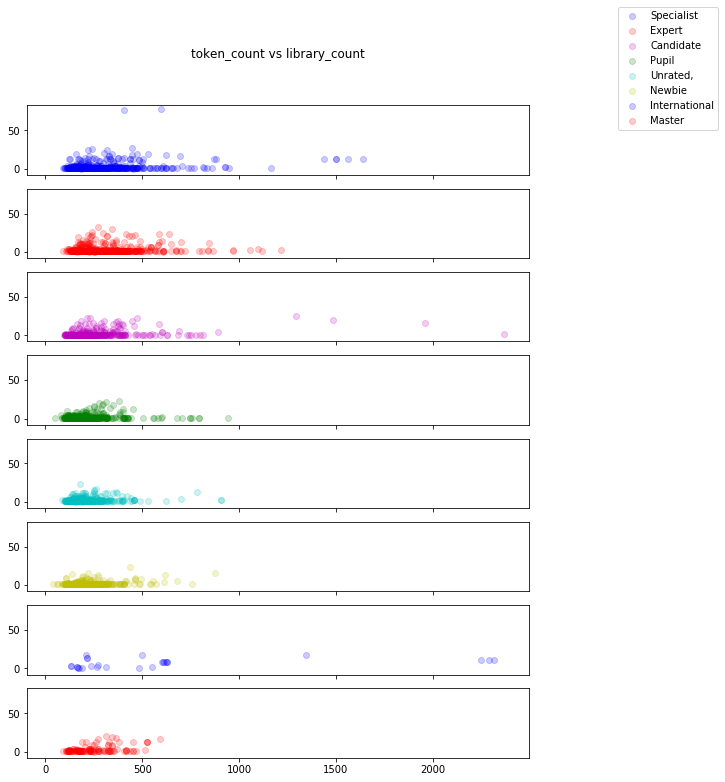

In [48]:
plot_data_2D_cat(token_count,library_count,usertype,'token_count vs library_count')

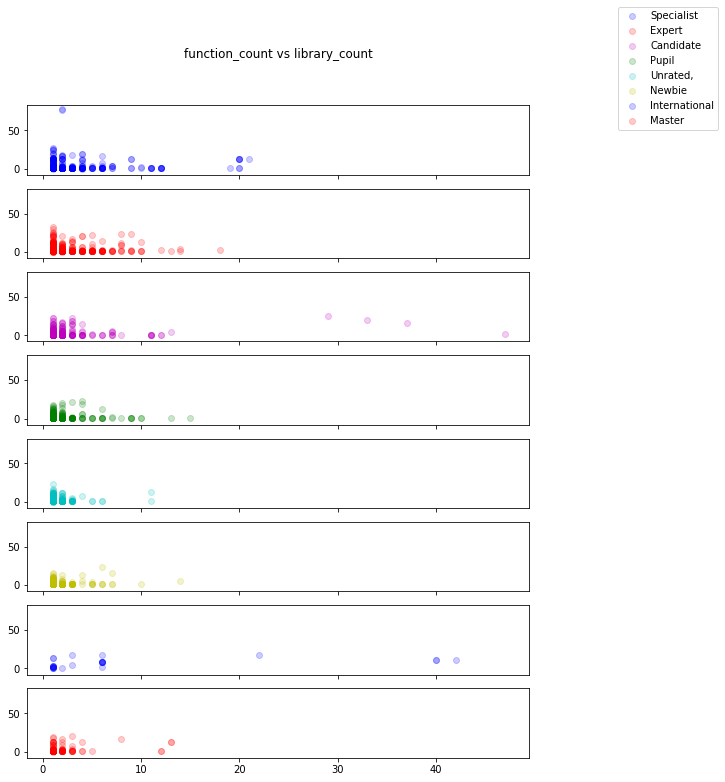

In [49]:
plot_data_2D_cat(function_count,library_count,usertype,'function_count vs library_count')

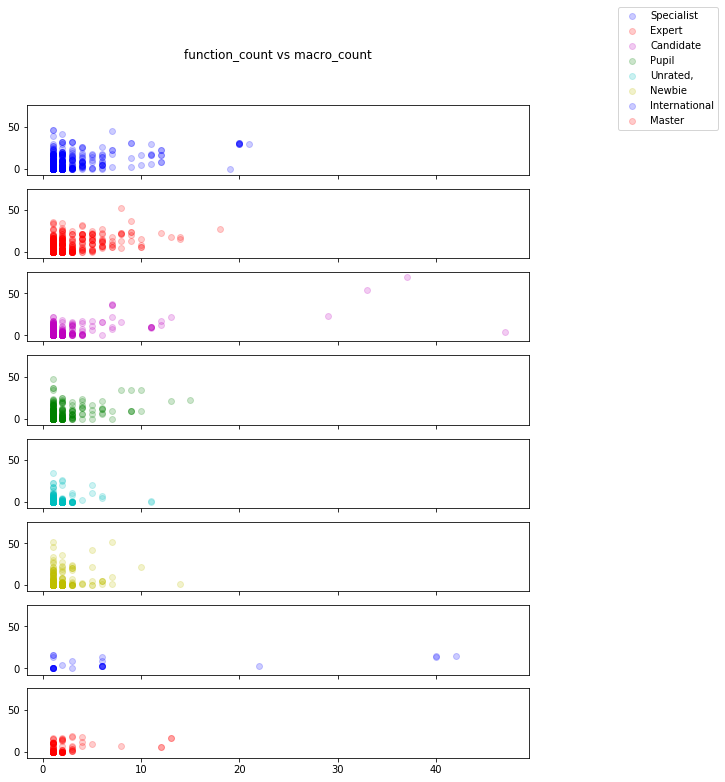

In [50]:
plot_data_2D_cat(function_count,macro_count,usertype,'function_count vs macro_count')

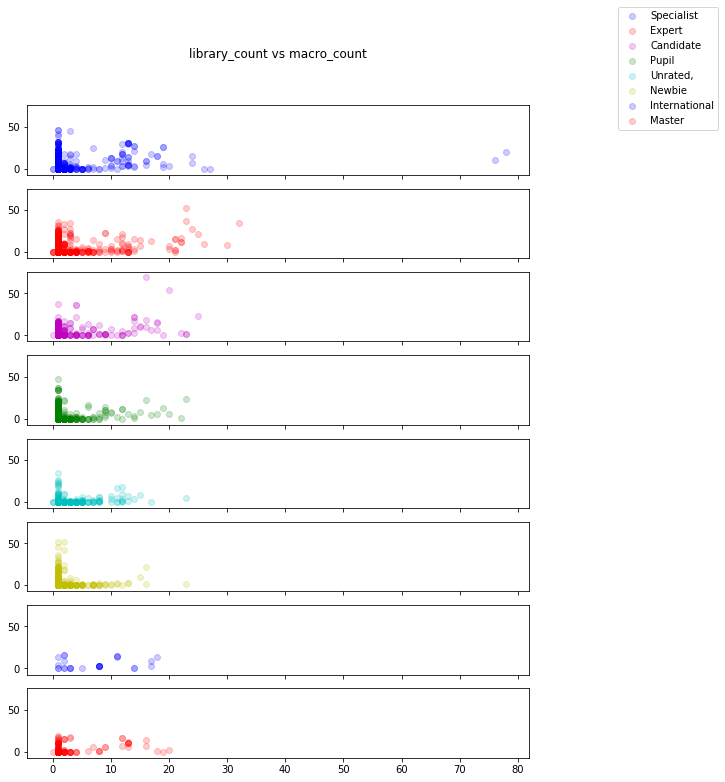

In [51]:
plot_data_2D_cat(library_count,macro_count,usertype,'library_count vs macro_count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


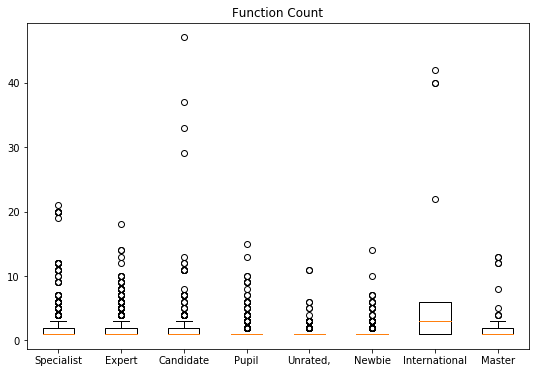

In [52]:
box_plot_cat(function_count,usertype,'Function Count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


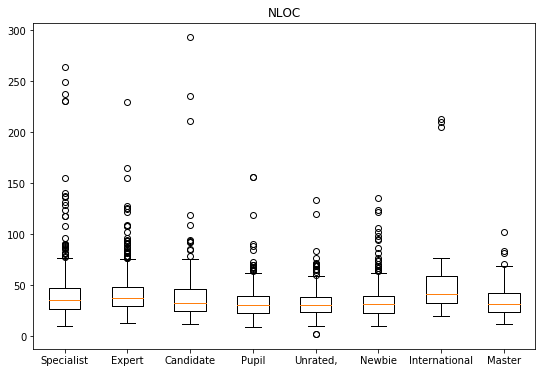

In [53]:
box_plot_cat(nloc,usertype,'NLOC')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


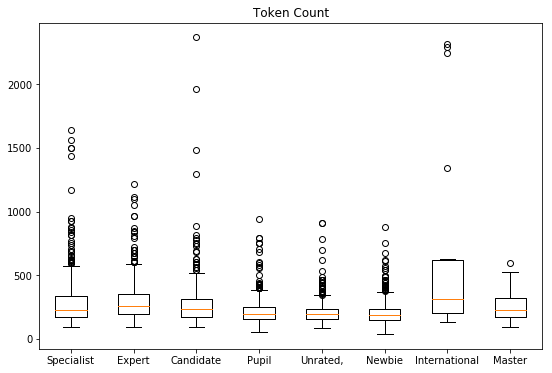

In [54]:
box_plot_cat(token_count,usertype,'Token Count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


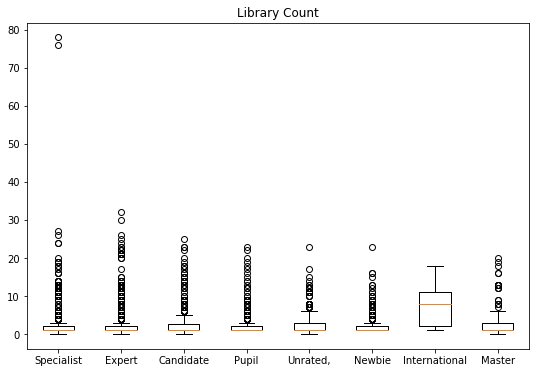

In [55]:
box_plot_cat(library_count,usertype,'Library Count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


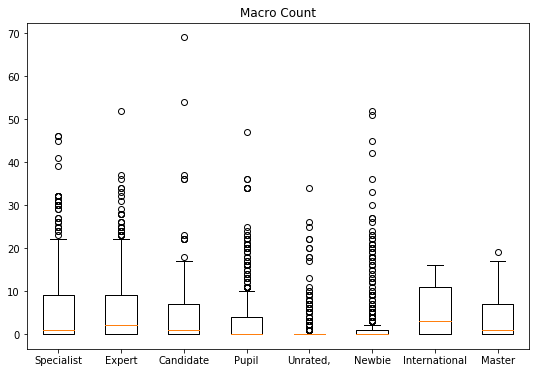

In [56]:
box_plot_cat(macro_count,usertype,'Macro Count')